# Scenario: 

### Analyze customer reviews and sentiment data to categorize them as positive, negative, or neutral, providing insights for businesses to improve customer satisfaction.

# DateSet

### reviewerName: Name or identifier of the reviewer
### overall: Overall Rating that has been given by the reviewer (Scale of 1 to 5)
### reviewText: Content of the review
### reviewTime: Time when the review was posted
### day_diff: Number of days since the post was posted
### helpful_yes: Number of users that have found the review helpful
### helpful_no: Number of user that have not founf the review helpful
### total_vote: Total amount of votes both helpful ot unhelpful





## Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import string
from collections import Counter

from textblob import TextBlob

import warnings
warnings.simplefilter('ignore', category=Warning, lineno=0, append=False)

## Importing

In [2]:
data = pd.read_csv('../data/amazon_reviews.csv', index_col='Unnamed: 0')
print(data.head())

   reviewerName  overall                                         reviewText  \
0           NaN      4.0                                         No issues.   
1          0mie      5.0  Purchased this for my device, it worked as adv...   
2           1K3      4.0  it works as expected. I should have sprung for...   
3           1m2      5.0  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men      5.0  Bought it with Retail Packaging, arrived legit...   

   reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
0  2014-07-23       138            0           0           0   
1  2013-10-25       409            0           0           0   
2  2012-12-23       715            0           0           0   
3  2013-11-21       382            0           0           0   
4  2013-07-13       513            0           0           0   

   score_pos_neg_diff  score_average_rating  wilson_lower_bound  
0                   0                   0.0                 0.0  
1       

## Lowercase Text

In [3]:
data['reviewText_lower'] = data['reviewText'].str.lower()
print(data['reviewText_lower'])

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText_lower, Length: 4915, dtype: object


## Punctuation Removal

In [4]:
text_punctu = [str(text).translate(str.maketrans('','',string.punctuation)) for text in data['reviewText_lower']]

## Tokenize the Data

In [5]:
tokenized_data = [nltk.word_tokenize(text) for text in text_punctu]
tokenized_data[:3]

[['no', 'issues'],
 ['purchased',
  'this',
  'for',
  'my',
  'device',
  'it',
  'worked',
  'as',
  'advertised',
  'you',
  'can',
  'never',
  'have',
  'too',
  'much',
  'phone',
  'memory',
  'since',
  'i',
  'download',
  'a',
  'lot',
  'of',
  'stuff',
  'this',
  'was',
  'a',
  'no',
  'brainer',
  'for',
  'me'],
 ['it',
  'works',
  'as',
  'expected',
  'i',
  'should',
  'have',
  'sprung',
  'for',
  'the',
  'higher',
  'capacity',
  'i',
  'think',
  'its',
  'made',
  'a',
  'bit',
  'cheesier',
  'than',
  'the',
  'earlier',
  'versions',
  'the',
  'paint',
  'looks',
  'not',
  'as',
  'clean',
  'as',
  'before']]

## StopWords

In [6]:
stop_words_english = set(stopwords.words('english'))

## StopWords Removal

In [7]:
data_filtered = [[word for word in text if word not in stop_words_english] for text in tokenized_data]
data_filtered[:3]

[['issues'],
 ['purchased',
  'device',
  'worked',
  'advertised',
  'never',
  'much',
  'phone',
  'memory',
  'since',
  'download',
  'lot',
  'stuff',
  'brainer'],
 ['works',
  'expected',
  'sprung',
  'higher',
  'capacity',
  'think',
  'made',
  'bit',
  'cheesier',
  'earlier',
  'versions',
  'paint',
  'looks',
  'clean']]

## Lemmatization 

In [8]:
data_filtered[:3]

[['issues'],
 ['purchased',
  'device',
  'worked',
  'advertised',
  'never',
  'much',
  'phone',
  'memory',
  'since',
  'download',
  'lot',
  'stuff',
  'brainer'],
 ['works',
  'expected',
  'sprung',
  'higher',
  'capacity',
  'think',
  'made',
  'bit',
  'cheesier',
  'earlier',
  'versions',
  'paint',
  'looks',
  'clean']]

In [10]:
lem = WordNetLemmatizer()

In [11]:
lemmatized_txt = [[lem.lemmatize(word) for word in text] for text in data_filtered]
lemmatized_txt[:3]

[['issue'],
 ['purchased',
  'device',
  'worked',
  'advertised',
  'never',
  'much',
  'phone',
  'memory',
  'since',
  'download',
  'lot',
  'stuff',
  'brainer'],
 ['work',
  'expected',
  'sprung',
  'higher',
  'capacity',
  'think',
  'made',
  'bit',
  'cheesier',
  'earlier',
  'version',
  'paint',
  'look',
  'clean']]

## Stemmatization

In [12]:
stem = PorterStemmer()
stem_txt = [[stem.stem(word) for word in text] for text in lemmatized_txt]
stem_txt[:3]


[['issu'],
 ['purchas',
  'devic',
  'work',
  'advertis',
  'never',
  'much',
  'phone',
  'memori',
  'sinc',
  'download',
  'lot',
  'stuff',
  'brainer'],
 ['work',
  'expect',
  'sprung',
  'higher',
  'capac',
  'think',
  'made',
  'bit',
  'cheesier',
  'earlier',
  'version',
  'paint',
  'look',
  'clean']]

## Vocabulary

In [14]:
vocab = set([word for text in stem_txt for word in text])
vocab

{'bb',
 'todayrecommend',
 'gzone',
 'subject',
 'nuvi',
 'malfunct',
 '230',
 'tabletim',
 'anyn',
 'er',
 '5947',
 'far',
 'exce',
 'tl240',
 'weigh',
 'perfectli',
 's3s4s2',
 'diskalthough',
 'reformatsinc',
 '85mb',
 'flush',
 'noth',
 'datastorag',
 '4fold',
 'wastenow',
 'tightli',
 'bore',
 '50mb',
 'product',
 'reconsid',
 'funciana',
 'd800e',
 'adaptership',
 'figur',
 'sdxccompat',
 'greatnoth',
 'spacehowev',
 '50100',
 'meant',
 'equiv',
 'aski',
 'lepan',
 'hasnt',
 'followssandisksandisk',
 'procrastin',
 'lawn',
 'skeptic',
 'bujgger',
 'jump',
 'pro',
 'feb',
 'computermayb',
 'sk',
 'crystaldiskmarkenjoy',
 'aspirecarri',
 'hdras15',
 'etc3pric',
 'songspicsor',
 'rich',
 'preship',
 'extens',
 'lighn',
 '1200w',
 'dsctx200v',
 '6gig',
 'swim',
 'snowboard',
 'inconveni',
 'priic',
 'entertain',
 'anythingwork',
 'mislabel',
 '43mbsbuy',
 'errorswrit',
 'must',
 'itjrroadrunn',
 'unroot',
 'winner',
 'itwork',
 'pretti',
 'albeit',
 'consist',
 'ure',
 'optimu',
 'fa

## Text PreProcessing Function

In [15]:
def preprocess_text(txt):
    # Converting the text to lowercase
    txt = txt.lower()
    # removing punctuation
    txt = txt.translate(str.maketrans('', '', string.punctuation))
    # tokenizing the text
    tokens = word_tokenize(txt)
    # removing the stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

### Preprocess the Data


In [16]:
#preprocessing the data
data['reviewText'].fillna('',inplace=True)
data_series_preprocessed = data['reviewText'].apply(preprocess_text)
data_series_preprocessed

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran 64gb card went...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspire 3...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things 64gb micro sd card crappi...
Name: reviewText, Length: 4915, dtype: object

In [17]:
#Intializing and Perfomring sentiment analysis
sia = SentimentIntensityAnalyzer()

sentiment = data_series_preprocessed.apply(lambda x: sia.polarity_scores(x)['compound'])
sentiment

0       0.0000
1       0.0000
2       0.4019
3       0.6486
4       0.8591
         ...  
4910    0.0772
4911    0.1761
4912    0.8481
4913    0.4939
4914    0.5267
Name: reviewText, Length: 4915, dtype: float64

## Sentiment Analyser

In [18]:
#categorize reviews as positive, negative, or neutral
senti_class = sentiment.apply(lambda x: 'positive' if x>0 else ( 'neutral' if x== 0 else 'negative'))

In [19]:
#Sentiment scores are added to the DataFrame
data_with_sentiment = pd.DataFrame({'Reviews': data['reviewText'], 'Sentiments': senti_class})

#DataFrame is displayed together with the sentiment scores
data_with_sentiment

,Reviews,Sentiments
0,No issues.,neutral
1,"Purchased this for my device, it worked as adv...",neutral
2,it works as expected. I should have sprung for...,positive
3,This think has worked out great.Had a diff. br...,positive
4,"Bought it with Retail Packaging, arrived legit...",positive
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,positive
4911,Used this for extending the capabilities of my...,positive
4912,Great card that is very fast and reliable. It ...,positive
4913,Good amount of space for the stuff I want to d...,positive


## Classifying Reviews

In [20]:
data_with_sentiment = pd.DataFrame({'Reviews': data['reviewText'], 'Sentiments': senti_class})

In [21]:
data['polarity'] = data_series_preprocessed.apply(lambda x: TextBlob(x).sentiment.polarity)

In [22]:
data_with_polarity = pd.DataFrame({'Reviews': data['reviewText'], 'Polarity': data['polarity']})
data_with_polarity

,Reviews,Polarity
0,No issues.,0.000000
1,"Purchased this for my device, it worked as adv...",-0.100000
2,it works as expected. I should have sprung for...,0.129167
3,This think has worked out great.Had a diff. br...,0.250000
4,"Bought it with Retail Packaging, arrived legit...",0.386667
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,0.012500
4911,Used this for extending the capabilities of my...,0.800000
4912,Great card that is very fast and reliable. It ...,0.350000
4913,Good amount of space for the stuff I want to d...,0.700000


In [81]:
data['sentiment']=data['polarity'].apply(lambda x: 'positive' if x>0 else ( 'neutral' if x== 0 else 'negative'))
data[['reviewText','sentiment']].head()

,reviewText,sentiment
0,No issues.,neutral
1,"Purchased this for my device, it worked as adv...",negative
2,it works as expected. I should have sprung for...,positive
3,This think has worked out great.Had a diff. br...,positive
4,"Bought it with Retail Packaging, arrived legit...",positive


### Reviews that are negative

In [67]:
neg = data['sentiment'] == 'negative'

In [68]:
polar = (data['polarity']) > -0.5

In [83]:
data[neg & polar].sort_values(by='polarity').head(10)

,reviewText,polarity,sentiment
2684,I was a little disappointed since it came with...,-0.468750,negative
3586,The SD to microSD card adapter that comes with...,-0.458333,negative
174,I bought this on August of 2013. As of April ...,-0.458333,negative
4020,I use it for my galaxy s4 and this card crashe...,-0.450000,negative
2461,I purchased four (4) items from amazon and whe...,-0.433333,negative
4117,im using this card on my galaxy note 2 but it'...,-0.400000,negative
2181,Works! And why should I write more..... damn i...,-0.400000,negative
1664,I only buy thru Amazon I've tried eBay and you...,-0.400000,negative
2534,I couldn't put any files onto the card that we...,-0.393750,negative
4765,"PERFECT,NO COMPLAINTS,USED AS A VIDEO CARD,ALM...",-0.393750,negative


In [85]:
data[data['sentiment'] == 'negative'].head(10)

,reviewText,polarity,sentiment
1,"Purchased this for my device, it worked as adv...",-0.100000,negative
5,It's mini storage. It doesn't do anything els...,-0.050000,negative
11,"It works, but file writes are a bit slower tha...",-0.100000,negative
14,Heard that the card's write speed is insuffici...,-0.035714,negative
24,San disk is hard to beat. You will pay more f...,-0.291667,negative
44,more like 8mb/s in my Note 10.1 and that's usi...,-0.050000,negative
47,This tiny marvel does what it claims. The onl...,-0.083333,negative
64,This card advertises itself as UHS1 but it's a...,-0.275000,negative
80,I purchased this after my wife and I bought ou...,-0.100000,negative
108,It works but the actual R/W speeds are 18/8 MB...,-0.032813,negative


### Reviews that are positive

In [92]:
data[data['sentiment'] == 'positive'].head(10)

,reviewText,polarity,sentiment
2,it works as expected. I should have sprung for...,0.129167,positive
3,This think has worked out great.Had a diff. br...,0.250000,positive
4,"Bought it with Retail Packaging, arrived legit...",0.386667,positive
6,I have it in my phone and it never skips a bea...,0.172222,positive
7,It's hard to believe how affordable digital ha...,0.085417,positive
8,Works in a HTC Rezound. Was running short of ...,0.100000,positive
9,"in my galaxy s4, super fast card, and am total...",0.533333,positive
10,I like this SD Card because it can take music ...,0.297279,positive
13,Solid SDHC card that is fast (at reading and w...,0.260000,positive
15,I bought this to use with my go pro hero 3 bla...,0.017857,positive


### Visualisation

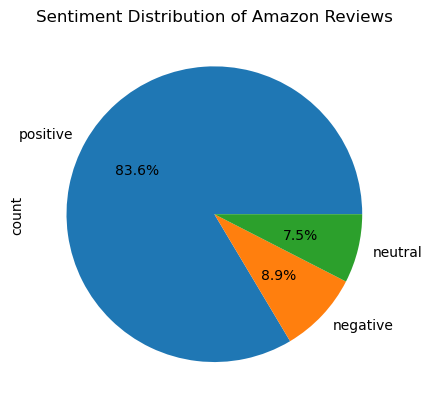

In [96]:
sentiment = data['sentiment'].value_counts()
sentiment.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution of Amazon Reviews')
plt.show()